In [1]:
import pandas
import scipy
import numpy
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = "https://data.urbansharing.com/oslobysykkel.no/trips/v1/2022/0{n}.csv"

In [3]:
data = pandas.concat([
pandas.read_csv(url.format(n=n), parse_dates=[0,1])
    for n in [4, 5, 6, 7]
])

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 636140 entries, 0 to 159260
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype              
---  ------                     --------------   -----              
 0   started_at                 636140 non-null  datetime64[ns, UTC]
 1   ended_at                   636140 non-null  datetime64[ns, UTC]
 2   duration                   636140 non-null  int64              
 3   start_station_id           636140 non-null  int64              
 4   start_station_name         636140 non-null  object             
 5   start_station_description  636124 non-null  object             
 6   start_station_latitude     636140 non-null  float64            
 7   start_station_longitude    636140 non-null  float64            
 8   end_station_id             636140 non-null  int64              
 9   end_station_name           636140 non-null  object             
 10  end_station_description    636124 non-null  object      

<AxesSubplot:ylabel='Frequency'>

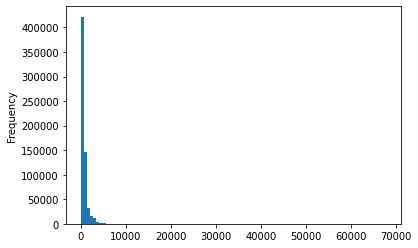

In [8]:
data['duration'].plot.hist(bins=100)

<AxesSubplot:ylabel='Frequency'>

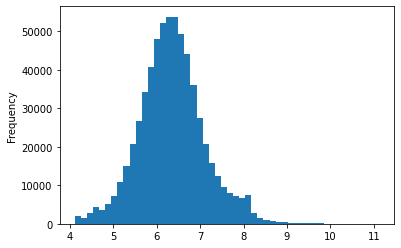

In [10]:
numpy.log(data['duration']).plot.hist(bins=50)

In [11]:
numpy.log(60*60)

8.1886891244442

In [14]:
mu,sigma = scipy.stats.norm.fit(numpy.log(data['duration']))

<AxesSubplot:ylabel='Frequency'>

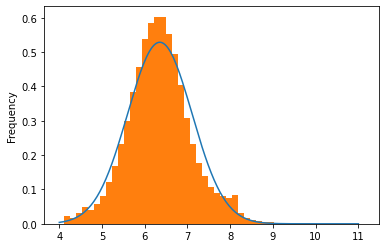

In [16]:
xs = numpy.linspace(4, 11, 200)
plt.plot(xs, scipy.stats.norm(mu, sigma).pdf(xs))
numpy.log(data['duration']).plot.hist(bins=50, density=True)

In [20]:
biggest10 = numpy.log(data['duration'].sort_values()[-10:])

In [21]:
scipy.stats.norm(mu, sigma).cdf(biggest10)

array([0.99999994, 0.99999994, 0.99999994, 0.99999994, 0.99999994,
       0.99999995, 0.99999996, 0.99999997, 1.        , 1.        ])

In [24]:
data.shape

(636140, 13)

In [26]:
numpy.exp(biggest10) / 60 / 60

53690      8.566111
99303      8.567500
39026      8.576389
8761       8.581667
49831      8.674722
151573     8.830556
102017     9.141667
108240     9.721667
81023     13.072500
40160     18.823611
Name: duration, dtype: float64

In [27]:
biggest10 / sigma

53690     13.704220
99303     13.704435
39026     13.705809
8761      13.706625
49831     13.720924
151573    13.744530
102017    13.790435
108240    13.871992
81023     14.264635
40160     14.748026
Name: duration, dtype: float64

In [28]:
scipy.stats.lognorm.fit(data['duration'])

(0.7817125606857132, 15.500213498083536, 553.2633575518133)

In [29]:
scipy.stats.lognorm.fit(data['duration'], floc=0)

(0.7542569594679288, 0.0, 573.9200734676854)

In [30]:
sigma

0.7542569594679288

In [31]:
numpy.exp(mu)

573.9200734676854

# Hypothsis testing interlude

In [32]:
per_day = data.groupby(pandas.Grouper(key='started_at', freq='D')).size()

<AxesSubplot:xlabel='started_at'>

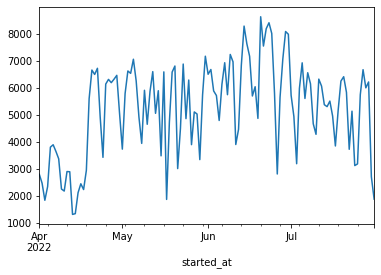

In [33]:
per_day.plot.line()

<AxesSubplot:xlabel='started_at'>

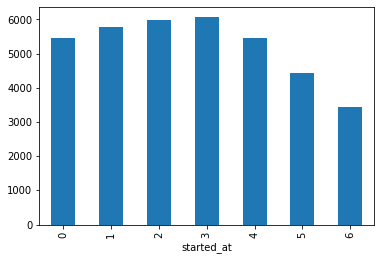

In [35]:
per_day.groupby(per_day.index.weekday).mean().plot.bar()

In [36]:
scipy.stats.chisquare(per_day.groupby(per_day.index.weekday).mean())

Power_divergenceResult(statistic=1058.8663573011704, pvalue=1.6531980573114888e-225)

In [38]:
scipy.stats.chisquare(per_day.groupby(per_day.index.weekday).mean()[:5])

Power_divergenceResult(statistic=52.75535416430522, pvalue=9.587756472881855e-11)

## Clustering

In [39]:
by_hour = data.groupby(pandas.Grouper(key='started_at', freq='h')).size()

In [40]:
by_hour

started_at
2022-04-01 03:00:00+00:00      9
2022-04-01 04:00:00+00:00     53
2022-04-01 05:00:00+00:00    212
2022-04-01 06:00:00+00:00    336
2022-04-01 07:00:00+00:00    166
                            ... 
2022-07-31 18:00:00+00:00    116
2022-07-31 19:00:00+00:00     51
2022-07-31 20:00:00+00:00     39
2022-07-31 21:00:00+00:00     21
2022-07-31 22:00:00+00:00     16
Freq: H, Length: 2924, dtype: int64

In [41]:
df_hour = pandas.DataFrame({'date': by_hour.index.date,
                            'hour': by_hour.index.hour,
                            'count': by_hour})

In [42]:
df_hour

,date,hour,count
started_at,,,
2022-04-01 03:00:00+00:00,2022-04-01,3,9
2022-04-01 04:00:00+00:00,2022-04-01,4,53
2022-04-01 05:00:00+00:00,2022-04-01,5,212
2022-04-01 06:00:00+00:00,2022-04-01,6,336
2022-04-01 07:00:00+00:00,2022-04-01,7,166
...,...,...,...
2022-07-31 18:00:00+00:00,2022-07-31,18,116
2022-07-31 19:00:00+00:00,2022-07-31,19,51
2022-07-31 20:00:00+00:00,2022-07-31,20,39


In [45]:
hourly = df_hour.pivot(index='date', columns='hour', values='count').fillna(0)

In [46]:
hourly

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
date,,,,,,,,,,,,,,,,,,,,,
2022-04-01,0.0,0.0,0.0,9.0,53.0,212.0,336.0,166.0,115.0,93.0,...,292.0,213.0,199.0,136.0,107.0,66.0,66.0,67.0,58.0,0.0
2022-04-02,0.0,0.0,0.0,6.0,11.0,23.0,34.0,60.0,125.0,164.0,...,199.0,228.0,208.0,166.0,63.0,48.0,62.0,92.0,49.0,1.0
2022-04-03,0.0,0.0,0.0,5.0,9.0,27.0,22.0,60.0,90.0,151.0,...,147.0,165.0,145.0,100.0,79.0,80.0,48.0,36.0,9.0,0.0
2022-04-04,0.0,0.0,0.0,9.0,43.0,157.0,172.0,74.0,43.0,48.0,...,320.0,289.0,237.0,174.0,145.0,103.0,79.0,29.0,16.0,0.0
2022-04-05,0.0,0.0,0.0,13.0,94.0,318.0,512.0,202.0,121.0,114.0,...,406.0,370.0,282.0,221.0,150.0,117.0,128.0,51.0,28.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-27,0.0,0.0,0.0,28.0,77.0,255.0,367.0,224.0,252.0,354.0,...,642.0,549.0,504.0,424.0,344.0,304.0,259.0,172.0,82.0,0.0
2022-07-28,0.0,0.0,0.0,19.0,67.0,247.0,353.0,218.0,240.0,285.0,...,580.0,569.0,454.0,367.0,360.0,273.0,228.0,132.0,70.0,1.0
2022-07-29,0.0,0.0,0.0,26.0,69.0,215.0,296.0,221.0,278.0,376.0,...,507.0,451.0,435.0,418.0,303.0,293.0,231.0,176.0,110.0,0.0


<AxesSubplot:xlabel='hour'>

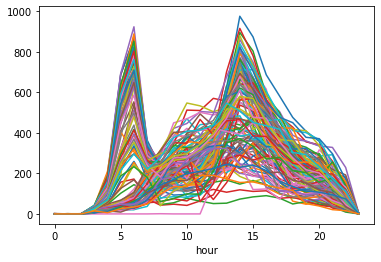

In [48]:
hourly.T.plot.line(legend=False)

In [49]:
from sklearn.cluster import KMeans

In [50]:
ks = list(range(1, 7))
scores = [KMeans(n_clusters=k).fit(hourly).inertia_ for k in ks]

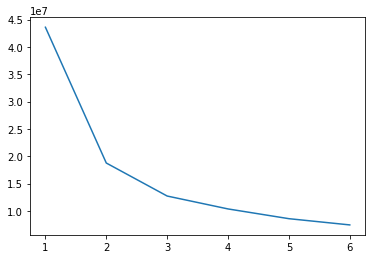

In [51]:
plt.plot(ks, scores)

In [52]:
model = KMeans(n_clusters=2).fit(hourly)

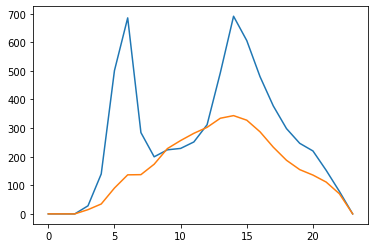

In [55]:
plt.plot(model.cluster_centers_.T)
None

In [56]:
model.inertia_

18757680.72370191

In [57]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1], dtype=int32)

In [62]:
days0 = hourly[model.labels_ == 0].index

In [63]:
grp0 = data['started_at'].dt.date.isin(days0)

In [64]:
data[grp0]['duration']

46696      168
46697      606
46698      500
46699      451
46700      140
          ... 
148467     973
148468     541
148469     640
148470    1897
148471     421
Name: duration, Length: 409393, dtype: int64

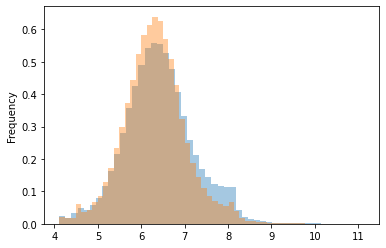

In [69]:
numpy.log(data['duration']).groupby(grp0).plot.hist(alpha=0.4, bins=50, density=True)
None

# Randomization

In [70]:
values = numpy.random.choice([0, 1], 1000) # p = 0.5

In [71]:
values.mean()

0.51

In [72]:
values.shape

(1000,)

In [73]:
def randomize(a, theta):
    coins = numpy.random.choice([True, False], p=(theta, 1-theta), size=a.shape)
    noise = numpy.random.choice([0, 1], size=a.shape)
    response = numpy.array(a)
    response[~coins] = noise[~coins]
    return response

In [74]:
values.mean()

0.51

In [75]:
randomize(values, 0.8).mean()

0.508

In [79]:
values = numpy.random.choice([0, 1], p=[0.8, 0.2], size=1000) # p = 0.2

In [80]:
values.mean()

0.189

In [83]:
randomize(values, 0.8).mean()

0.257

In [82]:
# theta * p + (1 - 0.8)
0.8 * 0.2 + (1 - 0.8)*0.5

0.26

In [84]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [85]:
df = pandas.read_csv('data/income_data.csv')

In [86]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,0


In [97]:
higher_ed = [' Masters', ' Bachelors', ' Doctorate', ' Prof-school']

In [98]:
df['education'].isin(higher_ed).mean()

0.24775037621694665

In [108]:
def mk_randomized_pipeline(theta):
    return Pipeline(steps=[
        ('higher-ed', FunctionTransformer(lambda x: x.isin(higher_ed)*1)),
        ('randomize', FunctionTransformer(randomize, kw_args={'theta': theta}))
    ])
def feature_transform(theta):
    return ColumnTransformer(transformers=[
        ('radomized_ed', mk_randomized_pipeline(theta), ['education']),
        ('age + hours', FunctionTransformer(), ['age', 'hours-per-week'])
    ])
def mk_model(theta, depth):
    return Pipeline(steps=[
        ('feature_trans', feature_transform(theta)),
        ('classifier', DecisionTreeClassifier(max_depth=depth))])

In [110]:
cross_val_score(mk_model(0.5, 5), df, df['target'], cv=10)

array([0.77310408, 0.76750614, 0.7718059 , 0.77211302, 0.77979115,
       0.77764128, 0.77764128, 0.78163391, 0.7730344 , 0.77395577])

Text(0, 0.5, 'avg. accuracy')

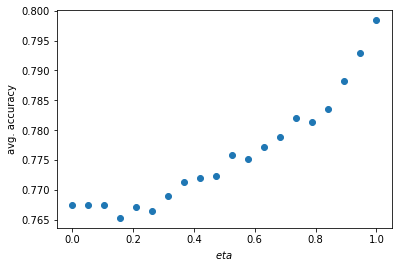

In [115]:
def calculate_mean_accuracy(theta, depth):
    return cross_val_score(
        mk_model(theta, depth), df, df['target']).mean()
thetas = numpy.linspace(0, 1, 20)
plt.scatter(thetas, [calculate_mean_accuracy(theta, 5) for theta in thetas])
plt.xlabel('$\teta$')
plt.ylabel('avg. accuracy')